In [1]:
#importing required libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# read cc data using pandas read_csv
cc_df =  pd.read_csv("CC GENERAL.csv")
cc_df.head() # print sample data

  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000       

In [4]:
cc_df.info() # printing dataset info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
cc_df.isnull().sum() # check for nulls in dataset columns to check column wise nulls

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64

In [12]:
#repplacing nulls with meadian value of its column
cc_df['CREDIT_LIMIT'] = cc_df['CREDIT_LIMIT'].fillna(cc_df['CREDIT_LIMIT'].mean())
cc_df['MINIMUM_PAYMENTS'] = cc_df['MINIMUM_PAYMENTS'].fillna(cc_df['MINIMUM_PAYMENTS'].mean())

In [14]:
cc_df.isnull().sum() # check for nulls after the conversion

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [15]:
# creating x, y sets for train data and target data (x = input data & y = output)
x = cc_df.iloc[:,:-1]
y = cc_df.iloc[:,-1]
x = x.drop(columns=['CUST_ID'], axis=1)

In [16]:
# applying PCA (pricipal component analysis) to dataset to reduce the number features
pca = PCA(2)
x_pca = pca.fit_transform(x)
cc_df2 = pd.DataFrame(data=x_pca, columns=['component_1', 'component_2'])
final_df = pd.concat([cc_df2, cc_df[['TENURE']]], axis=1)

final_df.head()
     

,component_1,component_2,TENURE
0,-4326.383979,921.566882,12
1,4118.916665,-2432.846346,12
2,1497.907641,-1997.578694,12
3,1394.548536,-1488.743453,12
4,-3743.351896,757.342657,12


In [18]:
# applying K Means algorithm to dataset from PCA 
from sklearn.cluster import KMeans
score = []
for i in range(1,11):
  model = KMeans(n_clusters=i)
  model.fit(final_df)
  score.append(model.inertia_)

([<matplotlib.axis.XTick at 0x2af4a97c730>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

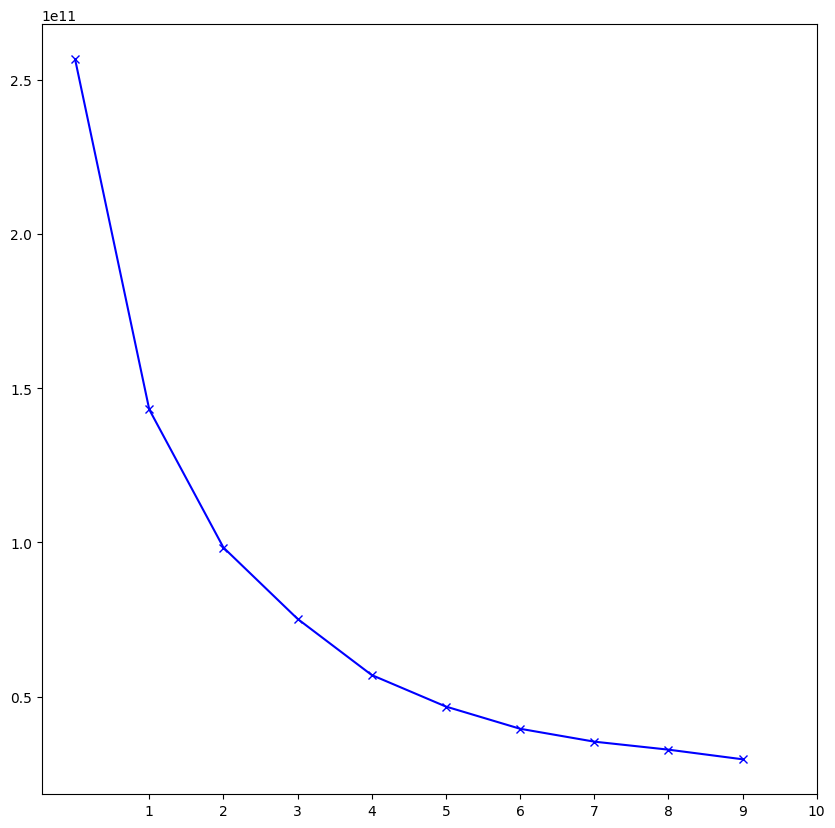

In [19]:

#Let's plot our WCSS over the range
plt.figure(figsize= (10,10))
plt.plot(score,'bx-')
plt.xticks(np.arange(1,11, step = 1))

In [20]:
# we can see the k before the plot get's linear is 4
# our optimal k for our Data is k = 4
# Let's apply KMeans
model = KMeans(n_clusters=4)
model.fit(final_df)
labels = model.labels_

In [23]:
#finding silhouette_score for KMeans model after applying the PCA on dataset
from sklearn.metrics import silhouette_score
score = silhouette_score(final_df, model.labels_, metric='euclidean')
score

np.float64(0.5013643293037361)

In [24]:
#Perform Scaling+PCA+K-Means and report performance
creditData = pd.read_csv('CC GENERAL.csv')
creditData.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [26]:
creditData.isnull().sum() # check for null in dataset columns

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [27]:
# replacing nulls with meadian of column
creditData['CREDIT_LIMIT'] = creditData['CREDIT_LIMIT'].fillna(creditData['CREDIT_LIMIT'].mean())
creditData['MINIMUM_PAYMENTS'] = creditData['MINIMUM_PAYMENTS'].fillna(creditData['MINIMUM_PAYMENTS'].mean())


In [28]:
creditData.isnull().sum()


CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [29]:
x = creditData.iloc[:,:-1]
y = creditData.iloc[:,-1]

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# removing CUST_ID from Creditdata
# apply StandardScaler to the dataset
x = x.drop(columns=['CUST_ID'],axis=1)
creditDataScaled = scaler.fit_transform(x)
creditDataScaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.52897879,
        -0.31096755, -0.52555097],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.81864213,
         0.08931021,  0.2342269 ],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.38380474,
        -0.10166318, -0.52555097],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.5706145 ,
        -0.33546549,  0.32919999],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.58053567,
        -0.34690648,  0.32919999],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.57686873,
        -0.33294642, -0.52555097]])

In [31]:
# Apply PCA for the scaled Credit Data 
pca = PCA(n_components=2)
pca_creditdata = pca.fit_transform(creditDataScaled)
pca_creditdata_df = pd.DataFrame(pca_creditdata, columns=['component_1', 'component_2'])
creditfinal_df = pd.concat([pca_creditdata_df, y], axis=1)
creditfinal_df.head()

,component_1,component_2,TENURE
0,-1.718893,-1.072940,12
1,-1.169306,2.509320,12
2,0.938414,-0.382600,12
3,-0.907503,0.045859,12
4,-1.637830,-0.684975,12


In [32]:
score = []
for i in range(1,11):
  model = KMeans(n_clusters=i)
  model.fit(creditfinal_df)
  score.append(model.inertia_)

([<matplotlib.axis.XTick at 0x2af4ab06620>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

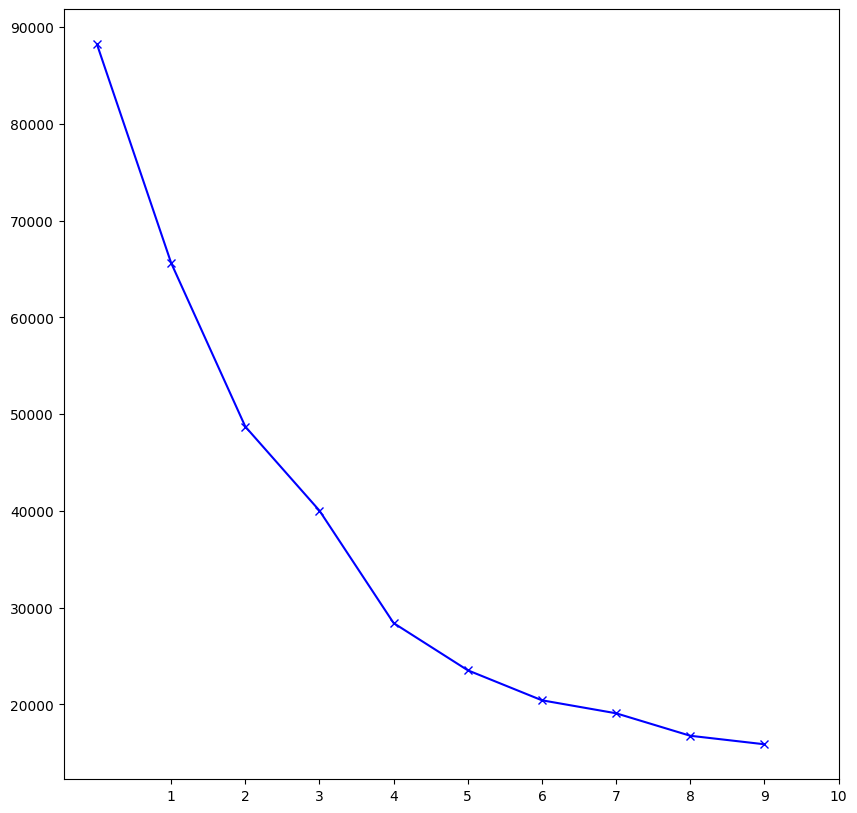

In [33]:

#Let's plot our WCSS over the range
plt.figure(figsize= (10,10))
plt.plot(score,'bx-')
plt.xticks(np.arange(1,11, step = 1))

In [34]:
# we can see the k before the plot get's linear is 4
# our optimal k for our Data is k = 4
# Let's apply KMeans
model = KMeans(n_clusters=4)
model.fit(final_df)
labels = model.labels_

In [35]:

sscore = silhouette_score(final_df, model.labels_, metric='euclidean')
print(sscore)

0.5071586019681079


In [ ]:
# finally silhouette_score increased after the scaling